<a href="https://colab.research.google.com/github/GGMmattos/Machine-Learning-And-Data-Science/blob/main/serie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Carregamento dos dados

In [3]:
#Carregamento dos dados
dataset = pd.read_csv('/content/drive/MyDrive/Alto Giro - BI/Serie Temporal/dataset.csv')

In [7]:
dataset.shape

(365, 2)

In [6]:
dataset.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [10]:
dataset.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [11]:
dataset.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


# Pré-Processamento


In [13]:
dataset['Data'].min()

'2023-01-01'

In [12]:
dataset['Data'].max()

'2023-12-31'

In [16]:
#Conversão da coluna de data para o tipo Datatime
dataset['Data'] = pd.to_datetime(dataset['Data'])

In [17]:
dataset.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [18]:
# Converter o DataFrame em uma séria temporal com a data como índice
serie_temporal = dataset.set_index('Data')['Total_Vendas']

In [20]:
type(serie_temporal)

pandas.core.series.Series

In [19]:
serie_temporal

,Total_Vendas
Data,
2023-01-01,53.483571
2023-01-02,57.176993
2023-01-03,63.087722
2023-01-04,62.103987
2023-01-05,44.690396
...,...
2023-12-27,74.935570
2023-12-28,71.374857
2023-12-29,57.806920


In [21]:
serie_temporal = serie_temporal.asfreq('D')

In [22]:
serie_temporal

,Total_Vendas
Data,
2023-01-01,53.483571
2023-01-02,57.176993
2023-01-03,63.087722
2023-01-04,62.103987
2023-01-05,44.690396
...,...
2023-12-27,74.935570
2023-12-28,71.374857
2023-12-29,57.806920


# Análise Exploratória

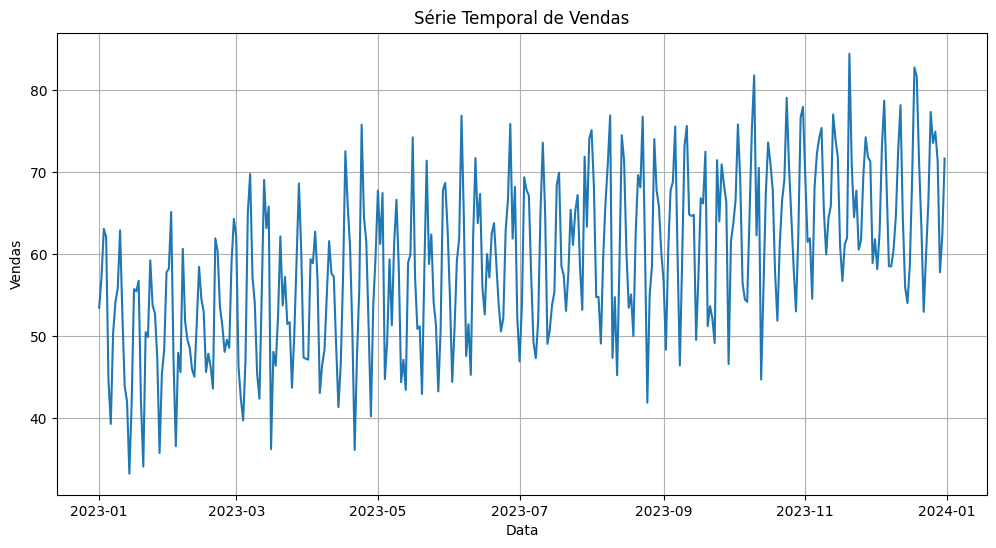

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal)
plt.title('Série Temporal de Vendas')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

# Treinamento do modelo

In [24]:
# Cria modelo
modelo  = SimpleExpSmoothing(serie_temporal)

In [25]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level=0.2)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [26]:
#Extrai os valores previsto pelo modelo
suavizacao_Exponencial = modelo_ajustado.fittedvalues

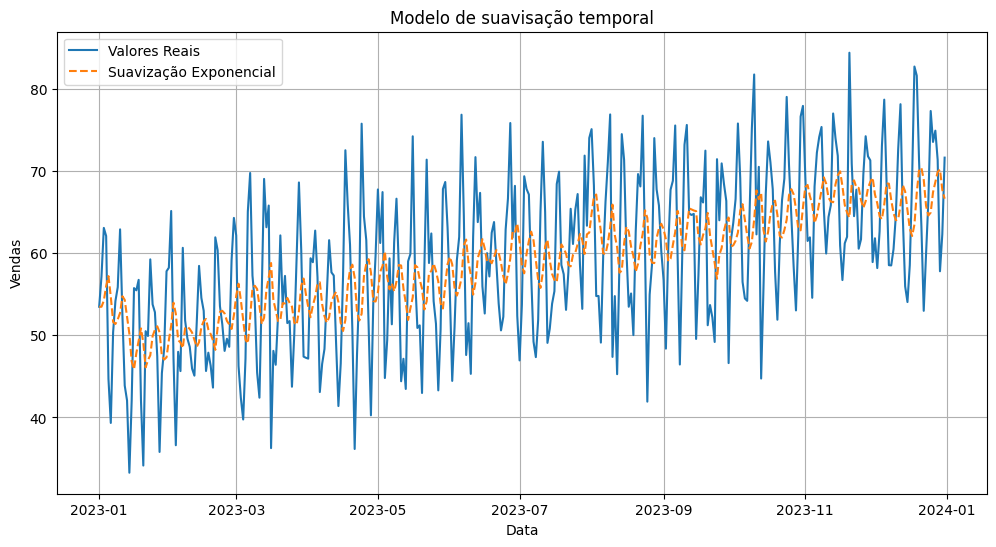

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label='Valores Reais')
plt.plot(suavizacao_Exponencial, label='Suavização Exponencial', linestyle = '--')
plt.title('Modelo de suavisação temporal')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)

# Deploy e Previsão do Modelo Treinado

In [46]:
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [47]:
print('Previsão para o Total de Vendas Para Janero/2024:', round(previsoes[0], 4))

Previsão para o Total de Vendas Para Janero/2024: 67.6499


<ipython-input-47-361bae3c6e14>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Previsão para o Total de Vendas Para Janero/2024:', round(previsoes[0], 4))
